# Mounting Drive
Mounting drive to fetch dataset and other resources from the drive

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Installing Spektral Library

In [2]:
!pip install git+https://github.com/danielegrattarola/spektral

  Cloning https://github.com/danielegrattarola/spektral to /tmp/pip-req-build-q2t_fan2
  Running command git clone -q https://github.com/danielegrattarola/spektral /tmp/pip-req-build-q2t_fan2
  Created wheel for spektral: filename=spektral-1.0.8-py3-none-any.whl size=123386 sha256=516babafd6a0a3190aa7f3e88c51ce75d8cb8781a24ebcaa1593f92a8c0dddd5
  Stored in directory: /tmp/pip-ephem-wheel-cache-b_7zx03g/wheels/af/7c/1f/e06aba9c0f493bb708968b8b396fe7523fdfb1c1c0818730be
Successfully built spektral


# Loading Dataset 

In [3]:
# Dataset loading
import os

dataset = "/content/drive/MyDrive/Project GCN Dataset/Dataset (Labelled Images)/"
# dataset = "./Dataset (Labelled Images)/"
lab_files_path = dataset+"Labels/"
# lab_files_path = dataset+"label/"

# total invoice files
files = os.listdir(lab_files_path)


# training set
train = files[:120]

# validation set
valid_set = files[120:125]

# test set
test = files[125: ]

print("Total Label files are: ", len(files))


Total Label files are:  129


# Geometric Algo

In [ ]:
from PIL.Image import Image
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from PIL import Image
import networkx as nx


# csv = './A-10.csv'
# df = pd.read_csv(csv)
df = 0
xMIN, xMAX = [], []
yMIN, yMAX = [], []
Text = []


def findRight(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMIN[i] > xmax):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)

    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMIN[consec] > xMIN[j]):
                consec = j
        return consec

    return -1


def findLeft(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    ymin = yMIN[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(xMAX[i] < xmin):
            if not (yMIN[i] > ymax or yMAX[i] < ymin):
                if(yMIN[i] <= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] <= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] <= ymax):
                    S_list.append(i)
                elif (yMIN[i] >= ymin and yMAX[i] >= ymax):
                    S_list.append(i)
                elif (yMIN[i] == ymin and yMAX[i] == ymax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(xMAX[j] > xMAX[consec]):
                consec = j
        return consec
    return -1


def findUp(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymin = yMIN[df_ind]

    for i in range(len(df)):
        if(yMAX[i] < ymin):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)

    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMAX[j] > yMAX[consec]):
                consec = j
        return consec

    return -1


def findDown(df, df_ind, xMIN, xMAX, yMIN, yMAX):
    S_list = []
    xmin = xMIN[df_ind]
    xmax = xMAX[df_ind]
    ymax = yMAX[df_ind]

    for i in range(len(df)):
        if(yMIN[i] > ymax):
            if not (xMAX[i] < xmin or xMIN[i] > xmax):
                if(xMIN[i] <= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] <= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] <= xmax):
                    S_list.append(i)
                elif (xMIN[i] >= xmin and xMAX[i] >= xmax):
                    S_list.append(i)
                elif (xMIN[i] == xmin and xMAX[i] == xmax):
                    S_list.append(i)
    # print(S_list)
    if S_list:
        consec = S_list[0]
        for j in S_list:
            if(yMIN[j] < yMIN[consec]):
                consec = j
        return consec

    return -1


def makeGraph(df):
    G = nx.Graph()
    xMIN = df['xmin']
    xMAX = df['xmax']
    yMIN = df['ymin']
    yMAX = df['ymax']
    Text = df['Object']

    for i in range(len(df)):
        if findUp(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findUp(df, i, xMIN, xMAX, yMIN, yMAX)
            if(l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findRight(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findRight(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findDown(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findDown(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
        if findLeft(df, i, xMIN, xMAX, yMIN, yMAX):
            l = findLeft(df, i, xMIN, xMAX, yMIN, yMAX)
            if (l != -1):
                text = Text[l]
                G.add_edge(Text[i], text)
    return G


# Matrices Over Diagonal
Place an incident Matrix over diagonal with existing matrix

In [ ]:
from typing import SupportsAbs
from numpy.core.fromnumeric import shape

# Test Matrices
# mat1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# mat2 = np.array([[3, 2, 1, 7], [6, 5, 4, 9], [9, 8, 7, 4], [1, 5, 7, 2]])


def alignDiagonally(M1, M2, prev_Len):
    for i in range(prev_Len, np.shape(M1)[0]):
        for j in range(prev_Len, np.shape(M1)[0]):
            x = i - prev_Len
            y = j - prev_Len
            M1[i][j] = M2[x][y]

    return M1


def resizeMatrix(M, I):
    oldMat_Len = np.shape(M)[0]
    z = np.zeros((oldMat_Len, np.shape(I)[0]), dtype=np.int64)
    newArray = np.append(M, z, axis=1)
    M = newArray

    # Appending 1D arrays of zeros in the original Matrix
    # (i.e. the matrix in which we want to align othe rmatrices diagonally)
    # for i in range(appZero):
    #     M = np.vstack((M, L))
    appZero = np.shape(I)[0]
    x = oldMat_Len + appZero
    L = np.zeros((np.shape(I)[0], x), dtype=np.int64)
    newArray = np.append(M, L, axis=0)
    M = newArray

    M = alignDiagonally(M, I, oldMat_Len)
    return M


# Dataset Batch 1

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from numpy.core.fromnumeric import shape

Z_file = lab_files_path + train[0]
df = pd.read_csv(Z_file)
G = makeGraph(df)
M1 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(1, 26):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + train[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M1 = resizeMatrix(M1, I)

print("Dimentions of Batch 1 matrix is: ", np.shape(M1))

# Dataset Batch 2

In [ ]:
Z1_file = lab_files_path + files[26]
df = pd.read_csv(Z1_file)
G = makeGraph(df)
M2 = nx.to_numpy_array(G, dtype=np.int32)

for i in range(27, 65):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M2 = resizeMatrix(M2, I)

print("Dimentions of Batch 2 matrix is: ", np.shape(M2))

# Dataset Batch 3

In [ ]:
Z2_file = lab_files_path + files[65]
df = pd.read_csv(Z2_file)
G = makeGraph(df)
M3 = nx.to_numpy_array(G, dtype=np.int32)
    
for i in range(66, 120):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M3 = resizeMatrix(M3, I)

print("Dimentions of Batch 3 matrix is: ", np.shape(M3))

# Validation Matrix

In [ ]:
Z3_file = lab_files_path + files[120]
df = pd.read_csv(Z2_file)
G = makeGraph(df)
M4 = nx.to_numpy_array(G, dtype=np.int32)
    
for i in range(121, 125):
    print("\n= = = = = = = = = = = = = = = =")
    print("Iteration No.: ", i)
    # Getting file
    f = lab_files_path + files[i]
    # Making dataframe of file
    df = pd.read_csv(f)
    # Making graph of the dataframe. 
    G = makeGraph(df)
    # Storing the graph as an incident matrix(an adjacency matrix)
    I = nx.to_numpy_array(G, dtype=np.int32)
    # Now resizing the original sparce matrix with the new incident matrix
    M4 = resizeMatrix(M4, I)

print("Dimentions of Validation matrix is: ", np.shape(M4))

# Saving Batches

In [ ]:
print("Saving Matrix")
# np.save("./Matrices/Matrix_b1.npy", M1)
np.save("/content/drive/MyDrive/Project GCN Dataset/Mat1.npy", M1)
np.save("/content/drive/MyDrive/Project GCN Dataset/Mat2.npy", M2)
np.save("/content/drive/MyDrive/Project GCN Dataset/Mat3.npy", M3)
np.save("/content/drive/MyDrive/Project GCN Dataset/ValMat.npy", M4)

print("Saved")

Saving Matrix
Saved


# Loading Matrix
Loading the sparce matrix in a variable A.

In [7]:
import numpy as np

# loading matrix
# A = np.load("./Matrices/Mat1.npy")
A1 = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat1.npy")
A2 = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat2.npy")
A3 = np.load("/content/drive/MyDrive/Project GCN Dataset/Mat3.npy")
A4 = np.load("/content/drive/MyDrive/Project GCN Dataset/ValMat.npy")
print("Printing Sparse Batch 1..")
print(A1)
print("Printing Sparse Batch 2..")
print(A2)
print("Printing Sparse Batch 3..")
print(A3)
print("Printing Sparse Validation Batch..")
print(A4)
print(np.shape(A1))


Printing Sparse Batch 1..
[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
Printing Sparse Batch 2..
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Printing Sparse Batch 3..
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
Printing Sparse Validation Batch..
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
(5040, 5040)


# Checking Sparse Matrix

(5040, 5040)


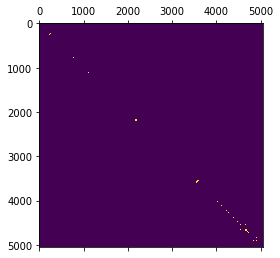

In [8]:
import matplotlib.pyplot as plt

plt.matshow(A1)
print(np.shape(A1))

# Generating Labels

In [9]:
from numpy import nan


def returnLabels(direc, files):
    labels = []
    for f in range(len(files)):
        seenList = []
        df = pd.read_csv(direc + files[f])
        text = df['Object'].to_list()
        T_labels = df['labels'].to_list()

        for i in range(len(text)):
            if(text[i] not in seenList):
                labels.append(T_labels[i])
            seenList.append(text[i])

    return labels

# Encoding Labels
1. Get a list of labels from CSV files.
2. Catagorically encode the labels 

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


labels = returnLabels(lab_files_path, files)
print("Total labels are: ", len(labels))

print("Encoding list..")
lab_encoder = LabelEncoder()
encodings = lab_encoder.fit_transform(labels)
print("Total Encodings are: ", len(encodings))


uni_enc = set(encodings)
print("Unique Encodings are: ", uni_enc)
encodings = np.transpose(encodings)

# Encodings for Mat_b1 are
e1_encodings_size = np.shape(A1)[0]
print("Size of batch1 matrix is: ", e1_encodings_size)
e1 = encodings[0:e1_encodings_size]
print("Total encodings for batch1 matrix are: ", len(e1))

# # Encodings for Mat_b2 are
e2_encodings_size = np.shape(A2)[0]
print("Size of batch2 matrix is: ", e1_encodings_size)
e2 = encodings[e1_encodings_size:e2_encodings_size+e1_encodings_size]
print("Total encodings for batch2 matrix are: ", len(e2))

# # Encodings for Mat_b3 are
e3_encodings_size = np.shape(A3)[0]
start = e2_encodings_size+e1_encodings_size
print("Size of batch3 matrix is: ", e1_encodings_size)
e3 = encodings[start:start+e3_encodings_size]
print("Total encodings for batch3 matrix are: ", len(e3))

# # Encodings for validation set are
e4_encodings_size = np.shape(A4)[0]
start += e3_encodings_size
val_enc  = encodings[start:start+e4_encodings_size]
# print("Total encodings for batch4 matrix are: ", len(e4))

# print("Total length", (len(e1) + len(e2) + len(e3) +len(e4)))

# print("Encodings for Batch 1 Matrix is: ", set(e1))


Total labels are:  21097
Encoding list..
Total Encodings are:  21097
Unique Encodings are:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}
Size of batch1 matrix is:  5040
Total encodings for batch1 matrix are:  5040
Size of batch2 matrix is:  5040
Total encodings for batch2 matrix are:  5556
Size of batch3 matrix is:  5040
Total encodings for batch3 matrix are:  8067


# Importing Deep Learning Libraries

In [11]:
# from tensorflow.keras import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import tensorflow as tf
from tensorflow.keras.regularizers import l2


from spektral.utils.sparse import sp_matrix_to_sp_tensor
from spektral.layers import GCNConv
from sklearn.metrics import classification_report
from spektral.utils import normalized_laplacian
from spektral.utils.sparse import sp_matrix_to_sp_tensor

import matplotlib.pyplot as plt
print("Libraries Imported..")


Libraries Imported..


In [12]:
# Hyper-parameters
channels = 32
dropout = 0.5
# learning_rate = 5e-4
l2_reg = 0.001
learning_rate = 0.0001
epochs = 250
# batch_size = np.shape(A1)[0]
batch_size = 16
es_patience = 10


In [13]:
import networkx as nx
# X = Features Matrix
X = np.matrix([[i, -i] for i in range(A1.shape[0])], dtype=float)
print("Printing Feature Matrix..")
print(X)

print("Before Identity Matrix")
# Identity matrix of the same shape as adjacency matrix
I = np.matrix(np.eye(A1.shape[0]))
print("After Identity Matrix")

# Self looping making node connections with themselves
# i.e. multiply the adjacency matrix with identity matrix
A_new = A1 + I

# Multiplying the self-looped graph with the feature matrix

# Stores the sum of array(Row wise) in a new array called D
D = np.array(np.sum(A1, axis=0))[0]
print(D)

# Making the diagonal matrix named D containing the elements of 1D array D
# D = np.matrix(np.diag(D))
# print("Printing the 2D array named D containing the elemnets of 1D D in diagonal")
# print(D)

# Stores the degree of the graph in a 1D array called D
D = np.array(np.sum(A_new, axis=0))[0]
print(D)
# Transforming that 1D array to a degree matrix
D = np.matrix(np.diag(D))
# print("Degree matrix of A_new multiplied by A_new..")
D_new = D * A_new
# print(D_new)

# Weight Matrix
W0 = np.random.randn(X.shape[1], 8) * 0.01

print("Printing Weights")
print(W0)

# Reducing feature of output feature representation..
print("Output feature representation..")
final = D_new**-1 * A_new * X * W0


def relu(x):
    return np.maximum(0, x)


H_1 = relu(final)
# print("After applying relu function..")
# print(H_1)

output = H_1

# print("Printing A_new matrix..")
# print(A_new)

G = nx.from_numpy_matrix(np.array(A_new))
# nx.draw_networkx_edges(G, pos=nx.spring_layout(
#     G), arrowstyle="<|-", style="dashed")
# plt.show()
# nx.draw(G)
# plt.savefig("/content/Sample Graph.png")
feature_representations = {
    node: np.array(output)[node]
    for node in G.nodes()
}

features = np.array(feature_representations.values())

# print("Printing feature representation..")
# print(features)

vals = []

for v in feature_representations.values():
    vals.append(v)

vals = np.array(vals)

print("Prining features in an array", vals)

# print("Shape of vals is: ", np.shape(vals))


Printing Feature Matrix..
[[ 0.000e+00  0.000e+00]
 [ 1.000e+00 -1.000e+00]
 [ 2.000e+00 -2.000e+00]
 ...
 [ 5.037e+03 -5.037e+03]
 [ 5.038e+03 -5.038e+03]
 [ 5.039e+03 -5.039e+03]]
Before Identity Matrix
After Identity Matrix
9
[10. 16.  3. ...  4.  6.  4.]
Printing Weights
[[ 0.00494554 -0.01176891  0.00820188 -0.00726988 -0.01021469  0.00022904
   0.01170208  0.00098823]
 [-0.01178473 -0.00225179  0.00200309  0.01688481  0.00354124 -0.00526822
  -0.01173773 -0.00287132]]
Output feature representation..
Prining features in an array [[  0.           3.0926401    0.         ...   0.           0.
    0.        ]
 [  0.           3.28624637   0.         ...   0.           0.
    0.        ]
 [  0.           3.30339979   0.         ...   0.           0.
    0.        ]
 ...
 [ 29.75635733   0.          11.02513433 ...   9.77739559  41.68991149
    6.8645732 ]
 [  0.         119.31350424   0.         ...   0.           0.
    0.        ]
 [ 90.78312601   0.          33.63638055 ...  29.829

# Validation Matrix Features

In [14]:
import networkx as nx

# X = Features Matrix
X = np.matrix([[i, -i] for i in range(A4.shape[0])], dtype=float)
print("Printing Feature Matrix..")
print(X)

print("Before Identity Matrix")
# Identity matrix of the same shape as adjacency matrix
I = np.matrix(np.eye(A4.shape[0]))
print("After Identity Matrix")

# Self looping making node connections with themselves
# i.e. multiply the adjacency matrix with identity matrix
A_new = A4 + I

# Multiplying the self-looped graph with the feature matrix

# Stores the sum of array(Row wise) in a new array called D
D = np.array(np.sum(A4, axis=0))[0]
print(D)

# Making the diagonal matrix named D containing the elements of 1D array D
# D = np.matrix(np.diag(D))
# print("Printing the 2D array named D containing the elemnets of 1D D in diagonal")
# print(D)

# Stores the degree of the graph in a 1D array called D
D = np.array(np.sum(A_new, axis=0))[0]
print(D)
# Transforming that 1D array to a degree matrix
D = np.matrix(np.diag(D))
# print("Degree matrix of A_new multiplied by A_new..")
D_new = D * A_new
# print(D_new)

# Weight Matrix
W0 = np.random.randn(X.shape[1], 8) * 0.01

print("Printing Weights")
print(W0)

# Reducing feature of output feature representation..
print("Output feature representation..")
final = D_new**-1 * A_new * X * W0


def relu(x):
    return np.maximum(0, x)


H_1 = relu(final)
# print("After applying relu function..")
# print(H_1)

output = H_1

# print("Printing A_new matrix..")
# print(A_new)

G = nx.from_numpy_matrix(np.array(A_new))
# nx.draw_networkx_edges(G, pos=nx.spring_layout(
#     G), arrowstyle="<|-", style="dashed")
# plt.show()
# nx.draw(G)
# plt.savefig("/content/Sample Graph.png")
feature_representations = {
    node: np.array(output)[node]
    for node in G.nodes()
}

features = np.array(feature_representations.values())

# print("Printing feature representation..")
# print(features)

val_fea = []

for v in feature_representations.values():
    val_fea.append(v)

val_fea = np.array(val_fea)

print("Prining features in an array", val_fea)

# print("Shape of vals is: ", np.shape(vals))


Printing Feature Matrix..
[[ 0.000e+00  0.000e+00]
 [ 1.000e+00 -1.000e+00]
 [ 2.000e+00 -2.000e+00]
 ...
 [ 1.347e+03 -1.347e+03]
 [ 1.348e+03 -1.348e+03]
 [ 1.349e+03 -1.349e+03]]
Before Identity Matrix
After Identity Matrix
13
[14.  8.  8. ...  4.  4.  4.]
Printing Weights
[[-4.43995157e-03  6.00470647e-03 -6.57522832e-03 -2.23831402e-03
   9.94404696e-03  9.90146567e-03 -1.66280042e-02 -1.54163074e-03]
 [ 4.69785696e-03 -2.06936545e-02 -3.82493665e-05  8.75089013e-03
  -2.58071930e-03  5.95310518e-03  5.05825738e-03  9.93913571e-03]]
Output feature representation..
Prining features in an array [[2.93440328e+15 0.00000000e+00 2.09920491e+15 ... 0.00000000e+00
  6.96405893e+15 3.68679193e+15]
 [0.00000000e+00 1.20423891e+14 0.00000000e+00 ... 1.78092180e+13
  0.00000000e+00 0.00000000e+00]
 [3.55768801e+14 0.00000000e+00 2.54508853e+14 ... 0.00000000e+00
  8.44326651e+14 4.46988849e+14]
 ...
 [4.99677260e+01 0.00000000e+00 3.57457669e+01 ... 0.00000000e+00
  1.18585673e+02 6.27795812

In [15]:
A = A1
N = A.shape[0]
F = vals.shape[1]
classes = 12
print("Node has ", F, " features")
print("Total Nodes are: ", N)

fltr = normalized_laplacian(A)
X_in = Input(batch_size=N, shape=(F))
print("Shape of X-in is: ", np.shape(X_in))

A_in = Input(tensor=sp_matrix_to_sp_tensor(fltr))
print("Shape of A-in is: ", np.shape(A_in))

# D1 = Dropout(dropout)(X_in)
G1 = GCNConv(channels, activation='LeakyReLU',kernel_regularizer=l2(l2_reg), use_bias=True)([X_in, A_in])
# G1 = GCNConv(channels, activation='LeakyReLU', use_bias=True)([X_in, A_in])
# D2 = Dropout(dropout)(G1)
G2 = GCNConv(channels, activation='LeakyReLU',kernel_regularizer=l2(l2_reg), use_bias=True)([G1, A_in])
# G2 = GCNConv(channels, activation='LeakyReLU', use_bias=True)([G1, A_in])

# # BN = BatchNormalization()(G2)
flatten = Flatten()(G2)

D1 = Dense(128, activation='relu')(flatten)
# Dr1 = Dropout(dropout)(D1)
D2 = Dense(32, activation='relu')(D1)
# # Dr2 = Dropout(dropout)(D2)
# D3 = Dense(16, activation='LeakyReLU')(D2)

D2_out = Dense(classes, activation='softmax')(D2)

model = Model(inputs=[X_in, A_in], outputs=D2_out)
# other loss = sparse_categorical_crossentropy
# model.compile(optimizer='Adagrad',loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', weighted_metrics=['acc'])

model.summary()


Node has  8  features
Total Nodes are:  5040
Shape of X-in is:  (5040, 8)
Shape of A-in is:  (5040, 5040)
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(5040, 8)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(5040, 5040)]       0                                            
__________________________________________________________________________________________________
gcn_conv (GCNConv)              (None, 32)           288         input_6[0][0]                    
                                                                 input_7[0][0]                    
_____________________________________________________________________________________

In [ ]:
W = {
    0: np.random.rand(),
    1: np.random.rand(),
    2: np.random.rand(),
    3: np.random.rand(),
    4: np.random.rand(),
    5: np.random.rand(),
    6: np.random.rand(),
    7: np.random.rand(),
    8: np.random.rand(),
    9: np.random.rand(),
    10: np.random.rand(),
    11: np.random.rand(),
}
model.fit([vals, A1],
          e1,
          epochs=200,
          batch_size=N,
          class_weight=W,
          # validation_data=([val_fea, A4], val_enc)
          # validation_split=0.1,
        )


Epoch 1/200
1/1 [==============================] - 0s 182ms/step - loss: 0.8137 - acc: 0.7797
Epoch 2/200
1/1 [==============================] - 0s 58ms/step - loss: 0.8382 - acc: 0.7801
Epoch 3/200
1/1 [==============================] - 0s 98ms/step - loss: 0.7393 - acc: 0.7802
Epoch 4/200
1/1 [==============================] - 0s 98ms/step - loss: 0.7964 - acc: 0.7821
Epoch 5/200
1/1 [==============================] - 0s 95ms/step - loss: 0.8126 - acc: 0.7800
Epoch 6/200
1/1 [==============================] - 0s 95ms/step - loss: 0.7607 - acc: 0.7805
Epoch 7/200
1/1 [==============================] - 0s 98ms/step - loss: 0.8810 - acc: 0.7803
Epoch 8/200
1/1 [==============================] - 0s 100ms/step - loss: 0.7983 - acc: 0.7813
Epoch 9/200
1/1 [==============================] - 0s 101ms/step - loss: 0.7797 - acc: 0.7823
Epoch 10/200
1/1 [==============================] - 0s 92ms/step - loss: 0.7496 - acc: 0.7810
Epoch 11/200
1/1 [==============================] - 0s 95ms/step -

# Saving Model

In [ ]:
model.save("/content/drive/MyDrive/Project GCN Dataset/IDS_Batch1_0.8942_tf_format.tf")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project GCN Dataset/IDS_Batch1_0.8942_tf_format.tf/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project GCN Dataset/IDS_Batch1_0.8942_tf_format.tf/assets


# Loading Model

In [16]:
from keras.models import load_model
# config = model.get_config()
# print(config)
loaded_model = load_model("/content/drive/MyDrive/Project GCN Dataset/IDS_Batch1_0.8942.h5", custom_objects = {"GCNConv": GCNConv})

loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(5040, 8)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(5040, 5040)]       0                                            
__________________________________________________________________________________________________
gcn_conv_2 (GCNConv)            (5040, 32)           288         input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
gcn_conv_3 (GCNConv)            (5040, 32)           1056        gcn_conv_2[0][0]           

In [5]:
!apt-get install poppler-utils 
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (120 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


# Prediction Starts Here

In [31]:
import os
from pdf2image import convert_from_path
from PIL import Image

test_invoices = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/PDF Invoices/"
im_path = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"
files = os.listdir(test_invoices)
print("Files found are: ", files)

def pdf_toImage(f):
    file_name = f
    # print("File processed is: ", file_name)
    if(file_name.endswith('.pdf')):
        print("PDF File Found..")
        print("Converting", file_name.split('/')[-1], "to Image..")
        pages = convert_from_path(file_name)

        for i in range(len(pages)):
            pages[i].save(im_path+(file_name.split('/')[-1]).split('.')
                          [0]+' page' + str(i) + '.png', 'PNG')
            
            #converting to grey-scale
            img = Image.open("/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"+file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png').convert('LA')
            
            

            img.save("/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"+file_name.split('/')[-1].split('.')[0]+' page' + str(i) + '.png')
            
            img = img.resize((1700,1800),Image.ANTIALIAS)
            print("Size of ", img.size)
            print("Converted to grey-scale")
            
    else:
        print("Image File Found..")

pdf_toImage(test_invoices+files[0])


Files found are:  ['Faber 1007843134 (1).pdf', 'pdf_1_AWFA02-user3_5fd169861ba88.pdf', '1007871548 (1).pdf', 'PO 1007880806 (1).pdf']
PDF File Found..
Converting Faber 1007843134 (1).pdf to Image..
Size of  (1700, 1800)
Converted to grey-scale
Size of  (1700, 1800)
Converted to grey-scale
Size of  (1700, 1800)
Converted to grey-scale
Size of  (1700, 1800)
Converted to grey-scale
Size of  (1700, 1800)
Converted to grey-scale
Size of  (1700, 1800)
Converted to grey-scale
Size of  (1700, 1800)
Converted to grey-scale


# Installing Tesseract-OCR and PyTesseract in Colab

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# Image to CSV 
Converting images to csv for making graphs.

In [ ]:
# Import required packages
import cv2
import pytesseract
import os
import pandas as pd

# Mention the installed location of Tesseract-OCR in your system
# pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

im_path = '/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/'
im_files = os.listdir(im_path)



# Read image from which text needs to be extracted
img = cv2.imread(im_path+im_files[0])

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(
    gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                      cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()

xmin = []
xmax = []
ymin = []
ymax = []
Text = []

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    xm = x + w
    ym = y + h

    xmin.append(x)
    xmax.append(xm)
    ymin.append(y)
    ymax.append(ym)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]

    # Open the file in append mode
    # file = open("recognized.txt", "a")

    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
    text = text.strip()
    Text.append(text)
    # print(xmin[i], "    ", xmax[i], "    ", ymin[i],
    #       "    ", ymax[i], "    ", text, "     ")

    # Appending the text into file
    # file.write(text)
    # file.write("\n")
    # i += 1
    # Close the file
    # file.close

# creating a dataframe
df = pd.DataFrame()


df['xmin'] = xmin
df['xmax'] = xmax
df['ymin'] = ymin
df['ymax'] = ymax
df['Object'] = Text


print(df)
df.to_csv("/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/CSVs/"+im_files[0].split('.')[0]+".csv", index=False)

# new_df = imageData_toCSV(im_path, im_files[0])
# print(new_df)



   xmin  xmax  ymin  ymax                                             Object
0     0   908  1730  2026  Purchase Order is not valid unless is signed b...
1     0  1656   194  1656  Tox Deliver To:\nA.W. FABER-CASTELL (M) SDN BH...
2   903  1656     5   191  Purchase Order\n\n  \n      \n\n  \n\n \n\nNO....


# Installing Keras-OCR 

In [32]:
!pip install keras-ocr

In [33]:
import keras_ocr
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pipeline = keras_ocr.pipeline.Pipeline()
im_path = "/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/"

im_files_list = os.listdir(im_path)
# img = mpimg.imread('/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/'+im_files_list[0])
# imgplot = plt.imshow(img)
# plt.show()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [48]:
import numpy as np
image_dir = im_path
custom_images = []

for filename in os.listdir(image_dir):
    print(os.path.join(image_dir, filename))
    custom_images.append(os.path.join(image_dir, filename))

images = [ keras_ocr.tools.read(path) for path in custom_images ]
batch_1 = images[:3].copy()
batch_2 = images[3:6].copy()
batch_3 = images[6:].copy()

%time prediction_1 = pipeline.recognize(batch_1)
%time prediction_2 = pipeline.recognize(batch_2)
%time prediction_3 = pipeline.recognize(batch_3)

/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page3.png
/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page4.png
/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page5.png
/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page6.png
/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page0.png
/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page1.png
/content/drive/MyDrive/Project GCN Dataset/Test Invoices Folder/Image Files/Faber 1007843134 (1) page2.png
CPU times: user 12.6 s, sys: 351 ms, total: 12.9 s
Wall time: 15.9 s
CPU times: user 12.2 s, sys: 399 ms, total: 12.6 s
Wall time: 15.5 s
CPU times: user 4.35 s, sys: 169 ms, total: 4.52 s
Wall time: 5.56 s


In [49]:
prediction_1
# print("\n\n")
# print("-----------------------------")
# prediction_2
# print("\n\n")
# print("-----------------------------")
# prediction_3

[[('purchase', array([[ 962.5     ,   12.890625],
          [1123.6328  ,   12.890625],
          [1123.6328  ,   45.117188],
          [ 962.5     ,   45.117188]], dtype=float32)),
  ('order', array([[1142.9688  ,   12.890625],
          [1246.0938  ,   12.890625],
          [1246.0938  ,   45.117188],
          [1142.9688  ,   45.117188]], dtype=float32)),
  ('no', array([[ 999.02344,   85.9375 ],
          [1033.3984 ,   85.9375 ],
          [1033.3984 ,  111.71875],
          [ 999.02344,  111.71875]], dtype=float32)),
  ('1007813134', array([[1147.2656 ,   85.9375 ],
          [1289.0625 ,   85.9375 ],
          [1289.0625 ,  111.71875],
          [1147.2656 ,  111.71875]], dtype=float32)),
  ('date', array([[ 983.9844 ,  120.3125 ],
          [1046.2891 ,  120.3125 ],
          [1046.2891 ,  146.09375],
          [ 983.9844 ,  146.09375]], dtype=float32)),
  ('05', array([[1140.8203 ,  120.3125 ],
          [1179.4922 ,  120.3125 ],
          [1179.4922 ,  141.79688],
          [

In [50]:
prediction_2

[[('purchase', array([[ 962.5     ,   12.890625],
          [1123.6328  ,   12.890625],
          [1123.6328  ,   45.117188],
          [ 962.5     ,   45.117188]], dtype=float32)),
  ('order', array([[1142.9688  ,   12.890625],
          [1246.0938  ,   12.890625],
          [1246.0938  ,   45.117188],
          [1142.9688  ,   45.117188]], dtype=float32)),
  ('no', array([[ 999.02344,   85.9375 ],
          [1033.3984 ,   85.9375 ],
          [1033.3984 ,  111.71875],
          [ 999.02344,  111.71875]], dtype=float32)),
  ('1007813134', array([[1147.2656 ,   85.9375 ],
          [1289.0625 ,   85.9375 ],
          [1289.0625 ,  111.71875],
          [1147.2656 ,  111.71875]], dtype=float32)),
  ('date', array([[ 983.9844 ,  120.3125 ],
          [1046.2891 ,  120.3125 ],
          [1046.2891 ,  146.09375],
          [ 983.9844 ,  146.09375]], dtype=float32)),
  ('05', array([[1140.8203 ,  120.3125 ],
          [1179.4922 ,  120.3125 ],
          [1179.4922 ,  141.79688],
          [

In [51]:
prediction_3

[[('purchase', array([[ 962.5     ,   12.890625],
          [1123.6328  ,   12.890625],
          [1123.6328  ,   45.117188],
          [ 962.5     ,   45.117188]], dtype=float32)),
  ('order', array([[1142.9688  ,   12.890625],
          [1246.0938  ,   12.890625],
          [1246.0938  ,   45.117188],
          [1142.9688  ,   45.117188]], dtype=float32)),
  ('no', array([[ 999.02344,   85.9375 ],
          [1033.3984 ,   85.9375 ],
          [1033.3984 ,  111.71875],
          [ 999.02344,  111.71875]], dtype=float32)),
  ('1007813134', array([[1147.2656 ,   85.9375 ],
          [1289.0625 ,   85.9375 ],
          [1289.0625 ,  111.71875],
          [1147.2656 ,  111.71875]], dtype=float32)),
  ('date', array([[ 983.9844 ,  120.3125 ],
          [1046.2891 ,  120.3125 ],
          [1046.2891 ,  146.09375],
          [ 983.9844 ,  146.09375]], dtype=float32)),
  ('05', array([[1140.8203 ,  120.3125 ],
          [1179.4922 ,  120.3125 ],
          [1179.4922 ,  141.79688],
          [